In [1]:
pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data=pd.read_csv("LoanApprovalPrediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##DESCRIPTION OF DATA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [5]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [6]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
data.dropna(subset=['Dependents','LoanAmount','Loan_Amount_Term'],inplace=True)

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
data['Credit_History'].value_counts()

1.0    434
0.0     71
Name: Credit_History, dtype: int64

In [10]:
data['Credit_History']=data['Credit_History'].fillna(1)

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
data.isnull().sum()/len(data)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [13]:
data.drop(columns=['Loan_ID'],inplace=True)

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [15]:
data['Credit_History']=data['Credit_History'].astype('int')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    float64
 3   Education          553 non-null    object 
 4   Self_Employed      553 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    int64  
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 56.2+ KB


#DATA PREPROCESSING AND ENCODING

In [17]:
cat_col_list=list(data.select_dtypes(include=['O']))
cat_col_list

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [18]:
gender_encode={'Male':0,'Female':1}

In [19]:
data['Gender']=data['Gender'].map(gender_encode)

In [20]:
married_encode={'Yes':1,'No':0}

In [21]:
data['Married']=data['Married'].map(married_encode)

In [22]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
edu_encode={'Graduate':1, 'Not Graduate':0}

In [24]:
data['Education']=data['Education'].map(edu_encode)

In [25]:
emp_encode={'Yes':1,'No':0}

In [26]:
data['Self_Employed']=data['Self_Employed'].map(emp_encode)

In [27]:
data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [28]:
area_encode={'Rural':0, 'Urban':1, 'Semiurban':2}

In [29]:
data['Property_Area']=data['Property_Area'].map(area_encode)

In [30]:
status_encode={'N':0,'Y':1}

In [31]:
data['Loan_Status']=data['Loan_Status'].map(status_encode)

In [32]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1,0,0
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1,1,1
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1,1,1
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1,1,1
5,0,1,2.0,1,1,5417,4196.0,267.0,360.0,1,1,1


#DATA VISUALIZATION

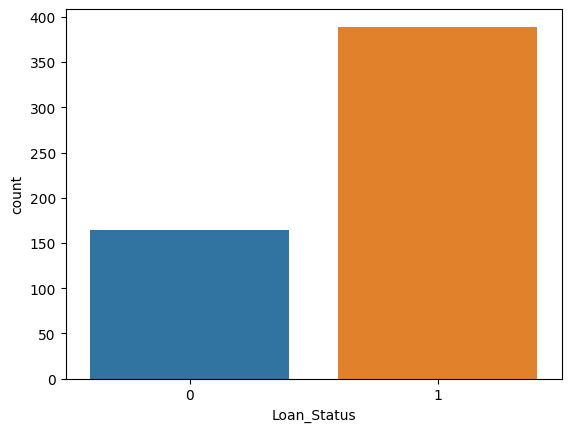

In [33]:
sns.countplot(x=data['Loan_Status'])
plt.show()

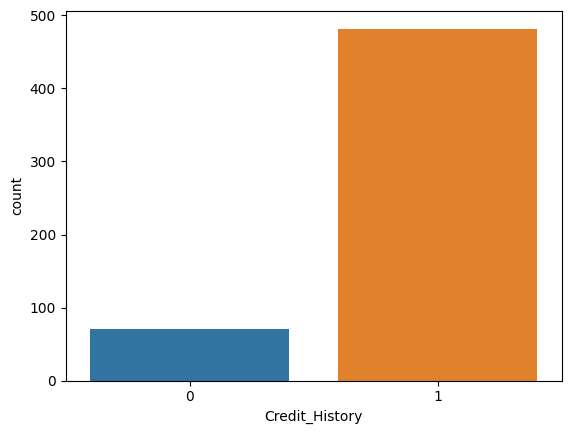

In [34]:
sns.countplot(x=data['Credit_History'])
plt.show()

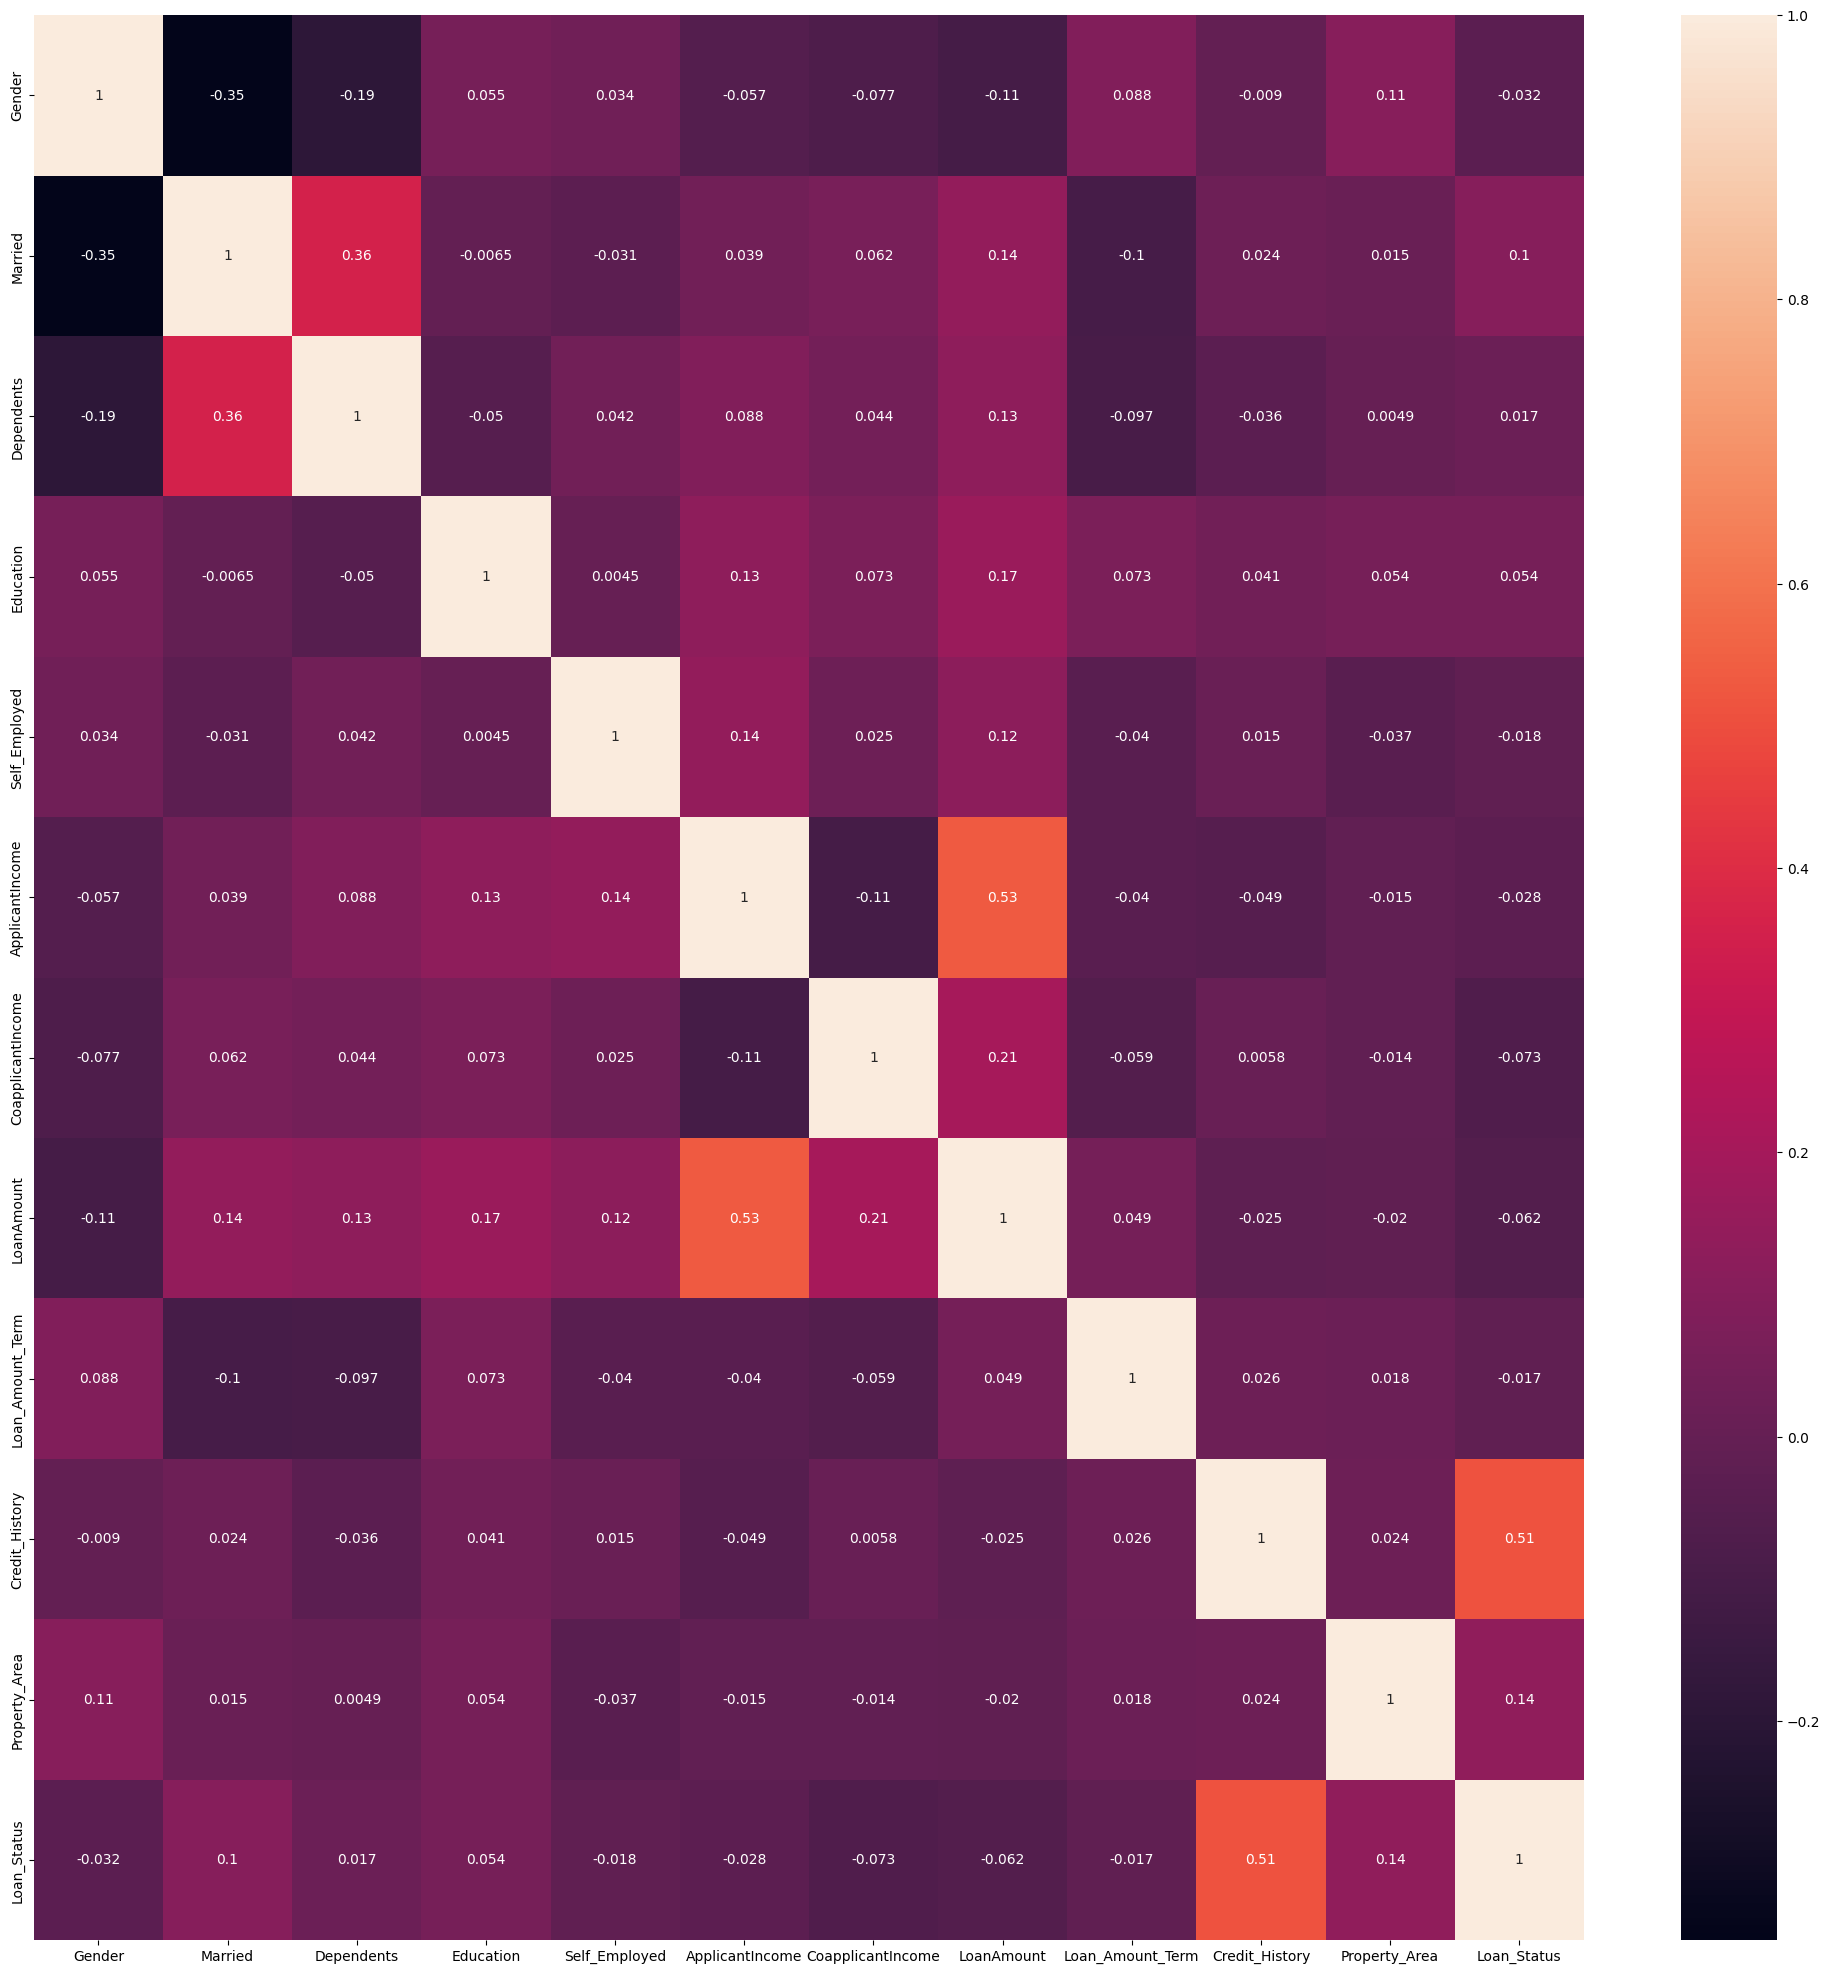

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

#MODEL BUILDING

In [36]:
x=data.iloc[:,:-1]

In [37]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1,0
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1,1
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1,1
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1,1
5,0,1,2.0,1,1,5417,4196.0,267.0,360.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
593,1,0,0.0,1,0,2900,0.0,71.0,360.0,1,0
594,0,1,3.0,1,0,4106,0.0,40.0,180.0,1,0
595,0,1,1.0,1,0,8072,240.0,253.0,360.0,1,1
596,0,1,2.0,1,0,7583,0.0,187.0,360.0,1,1


In [38]:
y=data.iloc[:,-1]

In [39]:
y

1      0
2      1
3      1
4      1
5      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 553, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [42]:
pip install xgboost

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [44]:
model1=LogisticRegression()

In [45]:
model1.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.88      0.47      0.62       135
           1       0.81      0.97      0.88       307

    accuracy                           0.82       442
   macro avg       0.84      0.72      0.75       442
weighted avg       0.83      0.82      0.80       442

Test Data
              precision    recall  f1-score   support

           0       0.69      0.31      0.43        29
           1       0.80      0.95      0.87        82

    accuracy                           0.78       111
   macro avg       0.74      0.63      0.65       111
weighted avg       0.77      0.78      0.75       111



In [49]:
model2=DecisionTreeClassifier()

In [50]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_train_pred=model2.predict(x_train)
y_test_pred=model2.predict(x_test)

In [52]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       307

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442

Test Data
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        29
           1       0.79      0.77      0.78        82

    accuracy                           0.68       111
   macro avg       0.59      0.59      0.59       111
weighted avg       0.68      0.68      0.68       111



In [53]:
model3=RandomForestClassifier()

In [54]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_train_pred=model3.predict(x_train)
y_test_pred=model3.predict(x_test)

In [56]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       307

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442

Test Data
              precision    recall  f1-score   support

           0       0.62      0.34      0.44        29
           1       0.80      0.93      0.86        82

    accuracy                           0.77       111
   macro avg       0.71      0.64      0.65       111
weighted avg       0.75      0.77      0.75       111



In [57]:
model4=AdaBoostClassifier()

In [58]:
model4.fit(x_train,y_train)

AdaBoostClassifier()

In [59]:
y_train_pred=model4.predict(x_train)
y_test_pred=model4.predict(x_test)

In [60]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.92      0.58      0.71       135
           1       0.84      0.98      0.90       307

    accuracy                           0.86       442
   macro avg       0.88      0.78      0.81       442
weighted avg       0.86      0.86      0.84       442

Test Data
              precision    recall  f1-score   support

           0       0.48      0.34      0.40        29
           1       0.79      0.87      0.83        82

    accuracy                           0.73       111
   macro avg       0.63      0.61      0.61       111
weighted avg       0.71      0.73      0.71       111



In [61]:
model5=BaggingClassifier()

In [62]:
model5.fit(x_train,y_train)

BaggingClassifier()

In [63]:
y_train_pred=model5.predict(x_train)
y_test_pred=model5.predict(x_test)

In [64]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       135
           1       0.99      1.00      1.00       307

    accuracy                           1.00       442
   macro avg       1.00      0.99      0.99       442
weighted avg       1.00      1.00      1.00       442

Test Data
              precision    recall  f1-score   support

           0       0.48      0.34      0.40        29
           1       0.79      0.87      0.83        82

    accuracy                           0.73       111
   macro avg       0.63      0.61      0.61       111
weighted avg       0.71      0.73      0.71       111



In [65]:
model6=GradientBoostingClassifier()

In [66]:
model6.fit(x_train,y_train)

GradientBoostingClassifier()

In [67]:
y_train_pred=model6.predict(x_train)
y_test_pred=model6.predict(x_test)

In [68]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       135
           1       0.88      1.00      0.94       307

    accuracy                           0.91       442
   macro avg       0.94      0.85      0.88       442
weighted avg       0.92      0.91      0.90       442

Test Data
              precision    recall  f1-score   support

           0       0.50      0.24      0.33        29
           1       0.77      0.91      0.84        82

    accuracy                           0.74       111
   macro avg       0.64      0.58      0.58       111
weighted avg       0.70      0.74      0.70       111



In [69]:
model7=SVC()

In [70]:
model7.fit(x_train,y_train)

SVC()

In [71]:
y_train_pred=model7.predict(x_train)
y_test_pred=model7.predict(x_test)

In [72]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       135
           1       0.70      1.00      0.82       307

    accuracy                           0.70       442
   macro avg       0.85      0.51      0.44       442
weighted avg       0.79      0.70      0.59       442

Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.74      0.99      0.84        82

    accuracy                           0.73       111
   macro avg       0.37      0.49      0.42       111
weighted avg       0.54      0.73      0.62       111



In [73]:
model8=XGBClassifier()

In [74]:
model8.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
y_train_pred=model8.predict(x_train)
y_test_pred=model8.predict(x_test)

In [76]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       307

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442

Test Data
              precision    recall  f1-score   support

           0       0.42      0.28      0.33        29
           1       0.77      0.87      0.82        82

    accuracy                           0.71       111
   macro avg       0.60      0.57      0.57       111
weighted avg       0.68      0.71      0.69       111



#APPLYING GRID SEARCH CROSS VALIDATION

#Logistic Regression

In [77]:
logistic_param={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'class_weight':[None,'balanced']}

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_logistic=GridSearchCV(model1,param_grid=logistic_param,scoring="f1_macro",cv=5,n_jobs=-1)

In [80]:
grid_logistic.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced']},
             scoring='f1_macro')

In [81]:
grid_logistic.best_params_

{'C': 10, 'class_weight': None}

In [82]:
grid_logistic.best_estimator_

LogisticRegression(C=10)

In [83]:
grid_logistic.best_score_

0.7358522985074271

In [84]:
y_train_pred=grid_logistic.predict(x_train)
y_test_pred=grid_logistic.predict(x_test)

In [85]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.84      0.50      0.62       135
           1       0.81      0.96      0.88       307

    accuracy                           0.82       442
   macro avg       0.82      0.73      0.75       442
weighted avg       0.82      0.82      0.80       442

Test Data
              precision    recall  f1-score   support

           0       0.64      0.31      0.42        29
           1       0.79      0.94      0.86        82

    accuracy                           0.77       111
   macro avg       0.72      0.62      0.64       111
weighted avg       0.75      0.77      0.74       111



#Decision Tree

In [86]:
dt_param={'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12]}

In [87]:
grid_decision=GridSearchCV(model2,param_grid=dt_param,scoring="f1_macro",cv=5,n_jobs=-1)

In [88]:
grid_decision.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='f1_macro')

In [89]:
grid_decision.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [90]:
grid_decision.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [91]:
grid_decision.best_score_

0.7145157853399805

In [92]:
y_train_pred=grid_decision.predict(x_train)
y_test_pred=grid_decision.predict(x_test)

In [93]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.93      0.41      0.57       135
           1       0.79      0.99      0.88       307

    accuracy                           0.81       442
   macro avg       0.86      0.70      0.72       442
weighted avg       0.83      0.81      0.78       442

Test Data
              precision    recall  f1-score   support

           0       0.75      0.31      0.44        29
           1       0.80      0.96      0.87        82

    accuracy                           0.79       111
   macro avg       0.77      0.64      0.66       111
weighted avg       0.79      0.79      0.76       111



#Random Forest

In [94]:
random_param={'max_depth':[3,5,7,10],'n_estimators':[50,100,150],'criterion':['gini','entropy']}

In [95]:
grid_random=GridSearchCV(model3,param_grid=random_param,scoring='f1_macro',cv=5,n_jobs=-1)

In [96]:
grid_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [97]:
grid_random.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}

In [98]:
grid_random.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=50)

In [99]:
grid_random.best_score_

0.730282279583374

In [100]:
y_train_pred=grid_random.predict(x_train)
y_test_pred=grid_random.predict(x_test)

In [101]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       135
           1       0.84      1.00      0.91       307

    accuracy                           0.87       442
   macro avg       0.92      0.78      0.82       442
weighted avg       0.89      0.87      0.85       442

Test Data
              precision    recall  f1-score   support

           0       0.67      0.28      0.39        29
           1       0.79      0.95      0.86        82

    accuracy                           0.77       111
   macro avg       0.73      0.61      0.63       111
weighted avg       0.76      0.77      0.74       111



#Extreme Gradient Boosting

In [102]:
xgb_param={'n_estimators':[50,100,150,200], 'max_depth':[2,5,7,9]}

In [103]:
grid_xgb=GridSearchCV(model8,param_grid=xgb_param,scoring='f1_macro',cv=5,n_jobs=-1)

In [104]:
grid_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_macro')

In [105]:
grid_xgb.best_params_

{'max_depth': 2, 'n_estimators': 50}

In [106]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [107]:
grid_xgb.best_score_

0.7189668455518244

In [108]:
y_train_pred=grid_xgb.predict(x_train)
y_test_pred=grid_xgb.predict(x_test)

In [109]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print('Test Data')
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       135
           1       0.83      0.99      0.90       307

    accuracy                           0.86       442
   macro avg       0.89      0.77      0.80       442
weighted avg       0.87      0.86      0.84       442

Test Data
              precision    recall  f1-score   support

           0       0.64      0.31      0.42        29
           1       0.79      0.94      0.86        82

    accuracy                           0.77       111
   macro avg       0.72      0.62      0.64       111
weighted avg       0.75      0.77      0.74       111



In [110]:
import pickle
file=open("log_model.pkl","wb")
pickle.dump(grid_logistic,file)